In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
from agents import EGreedy, Softmax
from bandit_testbed import TestBed

import numpy as np
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

<H3> 1. Define the agents with arguments for instantiation </H3>

In [ ]:
agents = { # Left empty here since for 
    # each figure I have defined different sets of agents
}

<H3> 2. Run the agents on the testbed </H3>

In [3]:
def measure_performance_on_testbed(agents, n_arms, n_plays, n_games):
    """
    :parma agents: A dictionary with a description and (Class, Arguments) for each agent
    :return A dictionary with { label : [ average_reward_stat, optimal_performance_stat]}
    :rtype: dict
    """
    output = {}
    
    for desc, agent in agents.items():
        
        # Initialize the stats
        average_reward = None
        prob_optimal_action = None
        average_optimal_reward = None
        
        # Create the testbed
        testbed = TestBed(n_arms, n_plays, n_games, agent_cls = agent["class"], cls_args = agent["args"])
        
        # Run all the games
        testbed.run_all_games()
        
        # Stack performance metrics across the n_games
        average_reward = np.stack([game["average_reward"] for game in testbed._games])
        prob_optimal_action = np.stack([game["prob_optimal_action"] for game in testbed._games])
        average_optimal_reward = np.mean([game["optimal_reward"] for game in testbed._games])
        
        # Average performance metrics across n_games
        average_reward_stat = np.mean(average_reward, axis=0)
        prob_optimal_action_stat = np.mean(prob_optimal_action, axis=0)

        output[desc] = [average_reward_stat, \
                        prob_optimal_action_stat, \
                        average_optimal_reward]
    return output

<H2> Figure 2.1 </H2>

In [ ]:
# Step 1
agents = {
    "greedy : e = 0.01": {"class": EGreedy, "args": {"e": 0.01}},
    "greedy : e = 0.1": {"class": EGreedy, "args": {"e": 0.1}},
    "softmax : tau = 1000": {"class": Softmax, "args": {"tau": 1000}},
    "greedy : e = 0.0": {"class": EGreedy, "args": {"e": 0.0}},
}

# Step 2
output = measure_performance_on_testbed(agents, n_arms = 10, \
                                   n_plays = 1000, n_games = 2000)

<b> Plot </b>

Optimal reward for greedy : e = 0.0 is 1.532742695999052
Optimal reward for greedy : e = 0.01 is 1.537430818626914
Optimal reward for greedy : e = 0.1 is 1.5547676603810385


/Users/shashank/.virtualenvs/openai/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


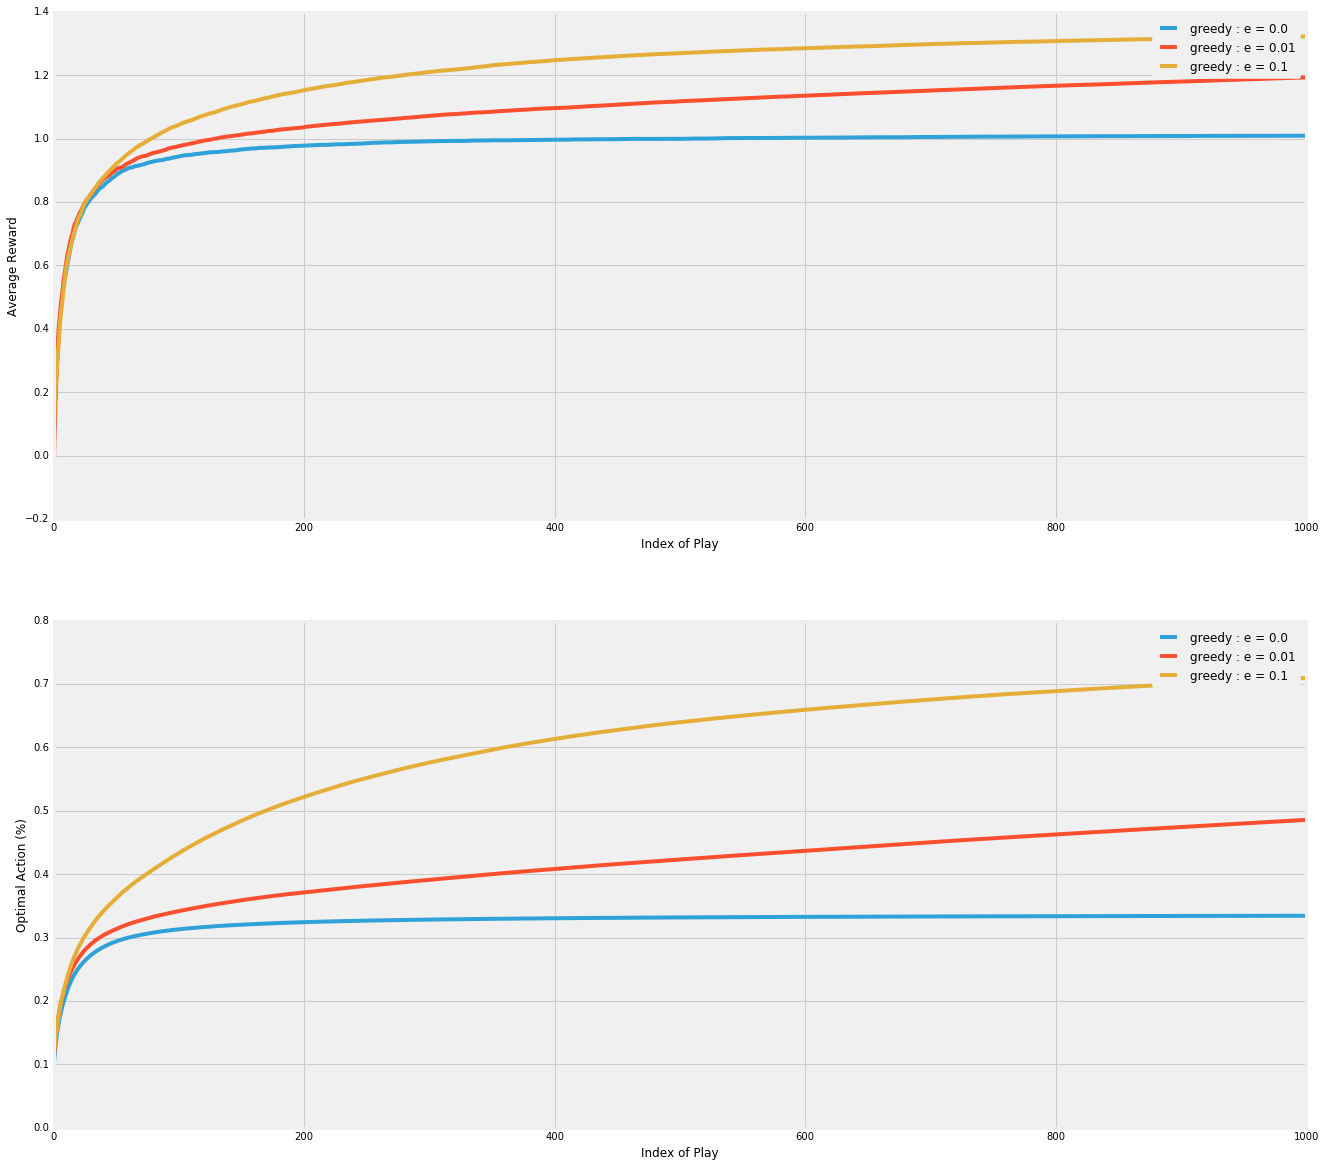

In [8]:
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
for desc, stat in output.items(): 
    
    average_reward_stat = stat[0]
    prob_optimal_action_stat = stat[1]
    average_optimal_reward = stat[2]
    
    ax1.plot(average_reward_stat, label = desc)
    ax1.set_ylabel('Average Reward')
    ax1.set_xlabel('Index of Play')
    
    ax2.plot(prob_optimal_action_stat, label = desc)
    ax2.set_ylabel('Optimal Action (%)')
    ax2.set_xlabel('Index of Play')
    
    print("Optimal reward for {} is {}".format(desc, average_optimal_reward))

ax1.legend() 
ax2.legend()
fig.show()

Exercise 2.1

In the comparison shown above, which method will perform best in the long run in terms of
cumulative reward and probability of selecting the best action ?
How much better will it be ?

Exercise 2.2

How does the softmax action selection method using Gibbs distribution
fare on the 10-armed testbed ? Run it at different temperature. 

In [ ]:
# Step 1
agents = {
    "softmax : tau = 0.001": {"class": Softmax, "args": {"tau": 0.001}},
    "softmax : tau = 0.01": {"class": Softmax, "args": {"tau": 0.01}},
    "softmax : tau = 0.1": {"class": Softmax, "args": {"tau": 0.1}}
}

# Step 2
output = {**output, **measure_performance_on_testbed(agents, n_arms = 10, \
                                   n_plays = 1000, n_games = 2000)}

In [ ]:
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
for desc, stat in output.items(): 
    
    average_reward_stat = stat[0]
    prob_optimal_action_stat = stat[1]
    average_optimal_reward = stat[2]
    
    ax1.plot(average_reward_stat, label = desc)
    ax1.set_ylabel('Average Reward')
    ax1.set_xlabel('Index of Play')
    
    ax2.plot(prob_optimal_action_stat, label = desc)
    ax2.set_ylabel('Optimal Action (%)')
    ax2.set_xlabel('Index of Play')
    
    print("Optimal reward for {} is {}".format(desc, average_optimal_reward))

ax1.legend() 
ax2.legend()
fig.show()

Exercise 2.3

Show that in the case of two actions, the softmax operation using the Gibbs 
distribution becomes the standard logistic function (or sigmoid) commonly
used in artificial neural networks. What effect does the temperature have 
have on the function ?

$$\frac{e^{Q1/T}}{e^{Q1/T} + e^{Q2/T}} = \frac{1}{1 + e^{Q2-Q1/T}} = \frac{1}{1 + e^{k(Q2-Q1)}}$$

$e^{a(Q2-Q1)}$ is the boltzmann factor for (State1/State2) where $a = 1/T$. Therefore as temperature increases the effect of energy difference will have decreasing effect on preference of one state over another.

<H2> Figure 2.3 </H2>

In [ ]:
def measure_performance_on_instructive_binary_testbed(agents, n_plays, n_games):
    """
    :parma agents: A dictionary with a description and (Class, Arguments) for each agent
    :return A dictionary with { label : [ average_reward_stat, optimal_performance_stat]}
    :rtype: dict
    """
    output = {}
    
    for desc, agent in agents.items():
        
        # Initialize the stats
        prob_optimal_action = None
        
        # Create the testbed
        testbed = InstructiveBinaryTestBed(n_plays, n_games, agent_cls = agent["class"], cls_args = agent["args"])
        
        # Run all the games with type A
        games_A = testbed.run_all_games('A')
        
        # Stack performance metrics across the n_games
        prob_optimal_action_A = np.stack([game["prob_optimal_action"] for game in games])
        
        # Average performance metrics across n_games
        prob_optimal_action_stat_A = np.mean(prob_optimal_action_A, axis=0)
        
        # Run all the games with type B
        games_A = testbed.run_all_games('B')
        
        # Stack performance metrics across the n_games
        prob_optimal_action_B = np.stack([game["prob_optimal_action"] for game in games])
        
        # Average performance metrics across n_games
        prob_optimal_action_stat_B = np.mean(prob_optimal_action_B, axis=0)

        output[desc] = [prob_optimal_action_stat_A, prob_optimal_action_stat_B]
    
    return output

In [ ]:
# Step 1
agents = {
    "L_R-I": {"class": LRI, "args": {"alpha": 0.1}},
    "L_R-P": {"class": LRP, "args": {"alpha": 0.1}},
    "supervised": {"class": SupervisedBinaryAgent, "args": {}}
}

# Step 2
output = {**measure_performance_on_instructive_binary_testbed(agents, \
                                   n_plays = 1000, n_games = 2000)}

In [ ]:
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for desc, stat in output.items(): 
    
    prob_optimal_action_stat_A = stat[1]
    
    ax1.plot(prob_optimal_action_stat_A, label = desc)
    ax1.set_ylabel('Optimal Action (%)')
    ax1.set_xlabel('Index of Play')
    
    prob_optimal_action_stat_B = stat[1]
    
    ax2.plot(prob_optimal_action_stat_B, label = desc)
    ax2.set_ylabel('Optimal Action (%)')
    ax2.set_xlabel('Index of Play')

ax1.legend() 
ax2.legend()
fig.show()